In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt

PHONE_DIR = 'wisdm-dataset/raw/phone/'
WATCH_DIR = 'wisdm-dataset/raw/watch/'
INDICIES = list(range(1600, 1630))

In [2]:
! ls wisdm-dataset/raw/phone/accel/

data_1600_accel_phone.txt data_1617_accel_phone.txt data_1634_accel_phone.txt
data_1601_accel_phone.txt data_1618_accel_phone.txt data_1635_accel_phone.txt
data_1602_accel_phone.txt data_1619_accel_phone.txt data_1636_accel_phone.txt
data_1603_accel_phone.txt data_1620_accel_phone.txt data_1637_accel_phone.txt
data_1604_accel_phone.txt data_1621_accel_phone.txt data_1638_accel_phone.txt
data_1605_accel_phone.txt data_1622_accel_phone.txt data_1639_accel_phone.txt
data_1606_accel_phone.txt data_1623_accel_phone.txt data_1640_accel_phone.txt
data_1607_accel_phone.txt data_1624_accel_phone.txt data_1641_accel_phone.txt
data_1608_accel_phone.txt data_1625_accel_phone.txt data_1642_accel_phone.txt
data_1609_accel_phone.txt data_1626_accel_phone.txt data_1643_accel_phone.txt
data_1610_accel_phone.txt data_1627_accel_phone.txt data_1644_accel_phone.txt
data_1611_accel_phone.txt data_1628_accel_phone.txt data_1645_accel_phone.txt
data_1612_accel_phone.txt data_1629_accel_phone.txt data_1646_ac

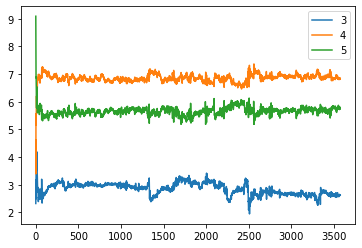

In [19]:
device = 'accel'
df = pd.read_csv(os.path.join(PHONE_DIR, device, f'data_{INDICIES[0]}_{device}_phone.txt'), header=None)
df = df[df[1] == 'J']
df.reset_index(inplace=True, drop=True)
df[5] = df[5].apply(lambda s: s[:-1]).astype(float)
df = df[[3, 4, 5]]
df.plot()
df.head()
plt.show()
# df.groupby(df.index // 30).mean().plot()
# print('-' * 20)
# device = 'gyro'
# df1 = pd.read_csv(os.path.join(PHONE_DIR, device, f'data_{INDICIES[0]}_{device}_phone.txt'), header=None)
# df1 = df1[df1[1] == 'B']
# df1.reset_index(inplace=True, drop=True)
# df1[5] = df1[5].apply(lambda s: s[:-1])
# print(df1.head())
# print(df1[2].min(), df1[2].max())
# print('-' * 20)
# df_merged = pd.merge(df, df1, on=2)
# df_merged = df_merged[['3_x', '4_x', '5_x', '3_y', '4_y', '5_y']]
# df_merged.head()

In [4]:
from sklearn.preprocessing import StandardScaler

def get_data_frame(index, device):
    df = pd.read_csv(os.path.join(PHONE_DIR, device, f'data_{index}_{device}_phone.txt'), header=None)
    df = df[df[1] == 'M']
    # print(df.shape)
    df = df[[3, 4, 5]]
    df.reset_index(inplace=True, drop=True)
    df[5] = df[5].apply(lambda s: s[:-1])
    return df

def get_data():
    TIMESTAPMS = 500
    X_acc = []
    X_gyro = []
    scaler = StandardScaler()
    for index in range(1600, 1651):
        df_acc = get_data_frame(index, 'accel')
        df_gyro = get_data_frame(index, 'gyro')
        # print(df_acc.shape, df_gyro.shape)
        # scaling data
        X_acc.append(scaler.fit_transform(df_acc)[:TIMESTAPMS])
        X_gyro.append(scaler.fit_transform(df_gyro)[:TIMESTAPMS])
    return np.array(X_acc), np.array(X_gyro)

In [5]:
X, Y = get_data()

In [6]:
print(X.shape, Y.shape)
# objects, timestamps, channels

(51, 500, 3) (51, 500, 3)


In [8]:
from hopls import HOPLS, rmse
import tensorly
tl.__version__

ModuleNotFoundError: No module named 'tensorly'

In [12]:
hopls_model = HOPLS(10, [2, 3], [2, 3], metric=rmse)
hopls_model.score(tl.tensor(X, dtype=tl.float64), tl.tensor(Y, dtype=tl.float64))

/usr/local/anaconda3/envs/pytorch_env/lib/python3.7/site-packages/tensorly/backend/core.py:885: UserWarning: In partial_svd: converting to NumPy. Check SVD_FUNS for available alternatives if you want to avoid this.
  warnings.warn('In partial_svd: converting to NumPy.'


ValueError: too many values to unpack (expected 2)

In [11]:
from tensorly.decomposition import tucker
tucker()

In [20]:
### Basic experiment

(40, 3) (40, 3)


<AxesSubplot:>

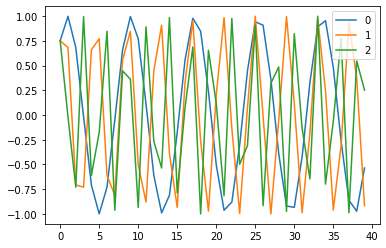

In [49]:
df_basic = pd.DataFrame()
TIMESTAMPS = 40
omega = 30
t = np.linspace(0, 1, num=TIMESTAMPS)
phase = np.random.rand()
df_basic[0] = np.sin(omega * t + phase)
df_basic[1] = np.sin(2 * omega * t + phase)
df_basic[2] = np.sin(3 * omega * t + phase)

X = df_basic.to_numpy()
W = np.random.rand(3, 3)
Y = X @ W
print(X.shape, Y.shape)
df_basic.plot()